In [1]:
cd ..

/home/dmitriishubin/Desktop/Projects/mask


In [13]:
import pyvista as pv
from pyvista import examples
import numpy as np
import copy
import cv2
from time import time
import matplotlib.pyplot as plt

import pyvista as pv
import vtk

In [14]:
def trans_to_matrix(trans):
    """Convert a numpy.ndarray to a vtk.vtkMatrix4x4 """
    matrix = vtk.vtkMatrix4x4()
    for i in range(trans.shape[0]):
        for j in range(trans.shape[1]):
            matrix.SetElement(i, j, trans[i, j])
    return matrix

In [19]:
mesh = pv.read("./data/3d_models/mask-low/source/rv6h86r8l3oj.obj")
tex = pv.read_texture("./data/3d_models/mask-low/textures/Mask_low_Low_Mtl_BaseColor.png")

#scale
points = mesh.extract_feature_edges()
points = points.points

mesh.translate(-1*np.mean(points,axis=0))

points = mesh.extract_feature_edges()
points = points.points
mesh.scale(1/np.max(np.abs(points)))




#mesh.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)
#mesh.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)

points = np.array([(0.1,0.5,0.1)])

poly = pv.PolyData(points)
#poly.plot(eye_dome_lighting=True)
#poly.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)

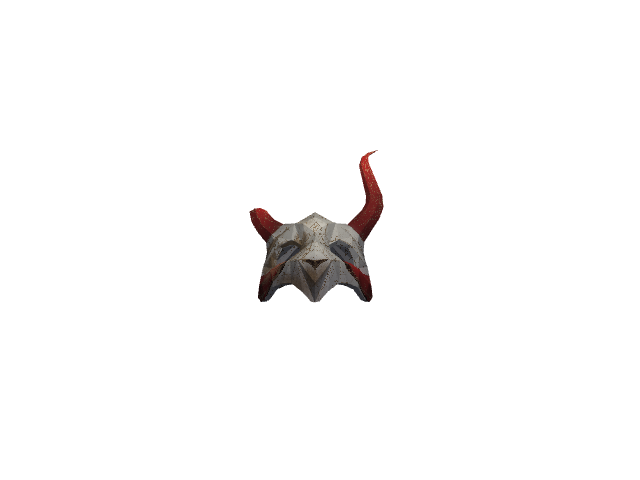

14.447822477584074


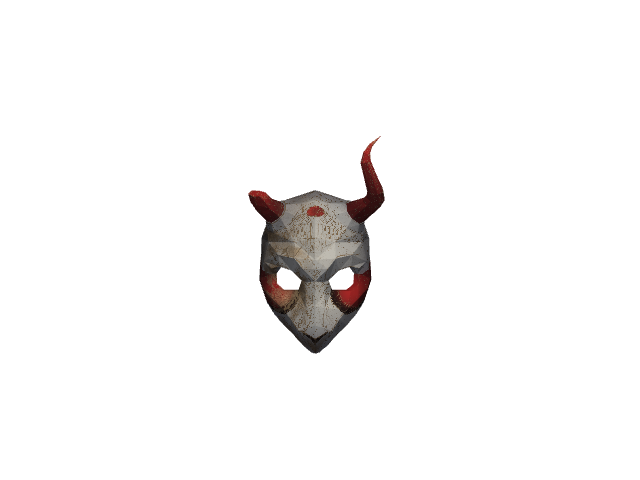

8.181246135450863


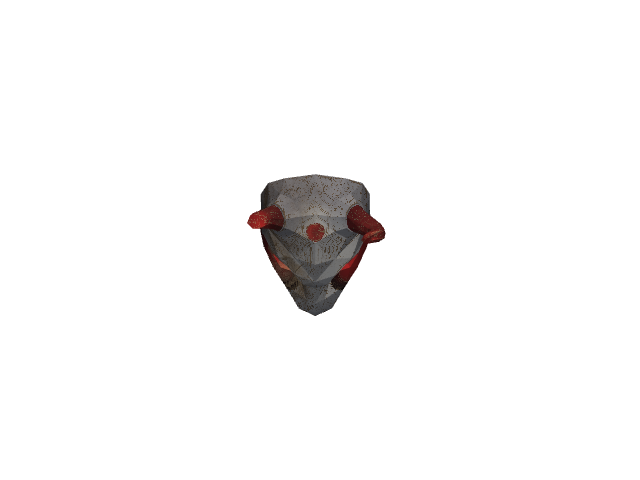

15.055310075988988


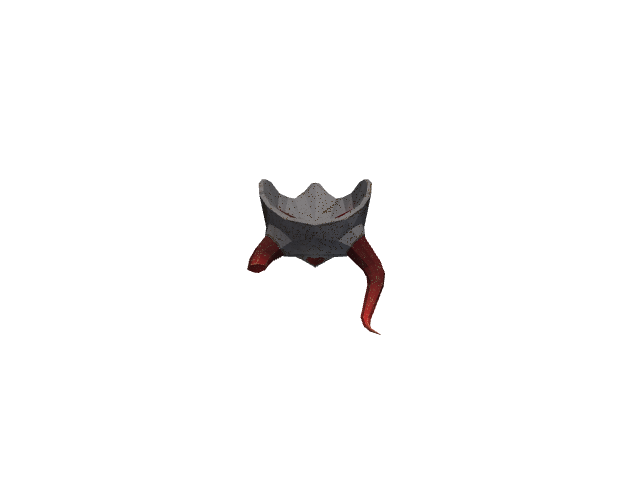

9.541378235678165


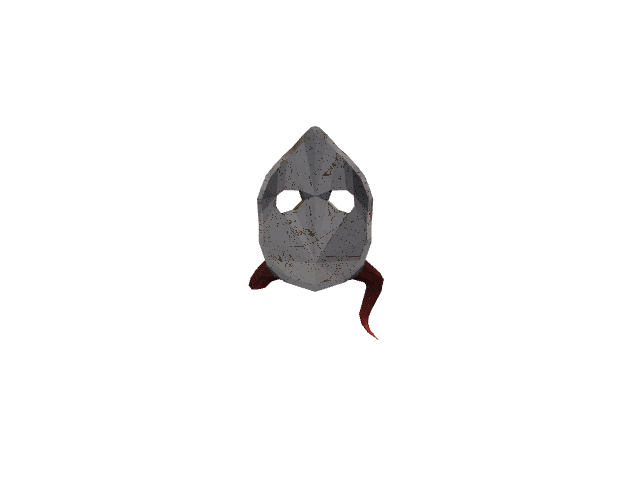

12.81803318266971


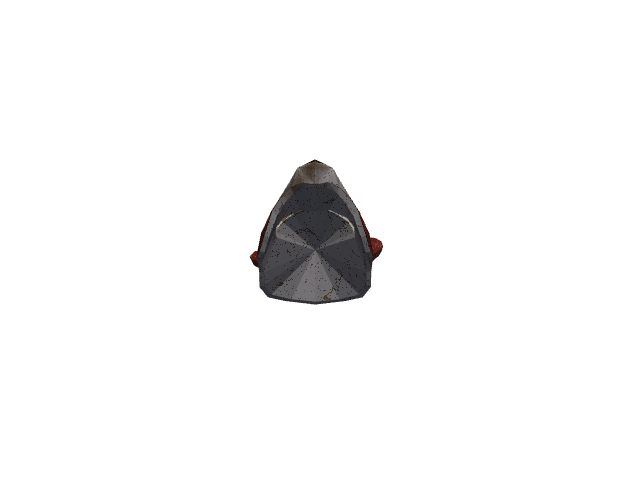

20.416596896357017


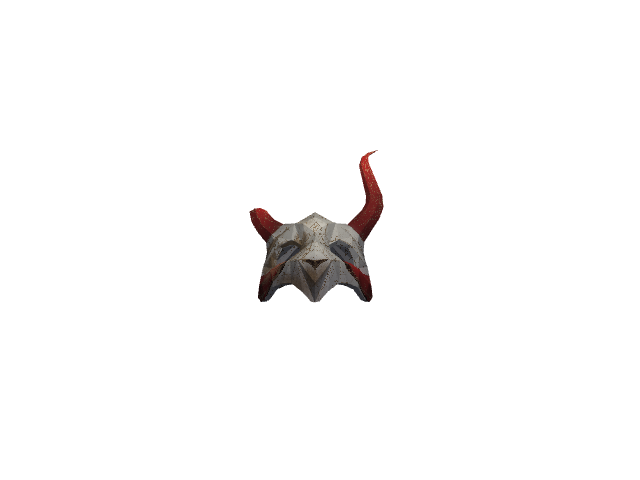

20.225599876552735


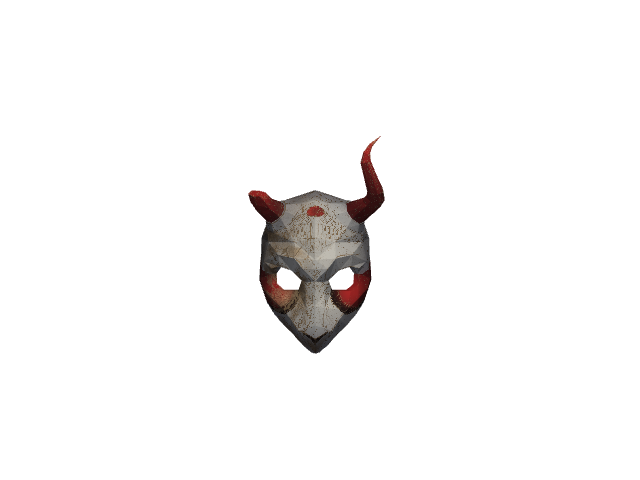

19.769252885752934


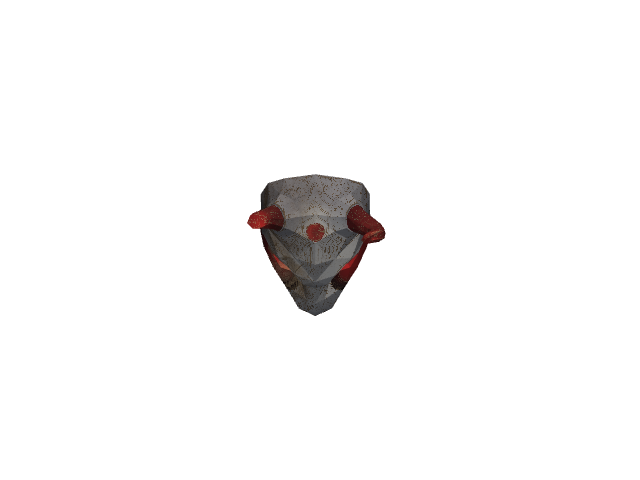

19.810524227639206


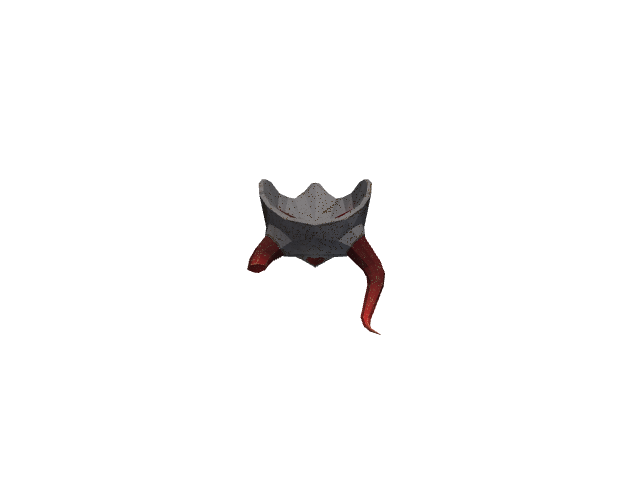

19.923920272093333


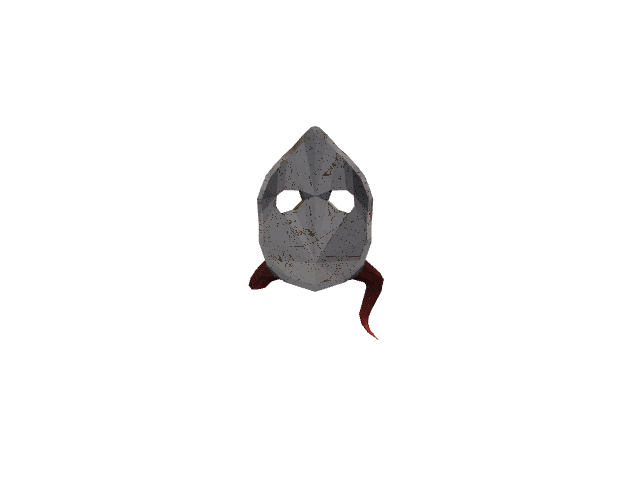

16.185724870338355


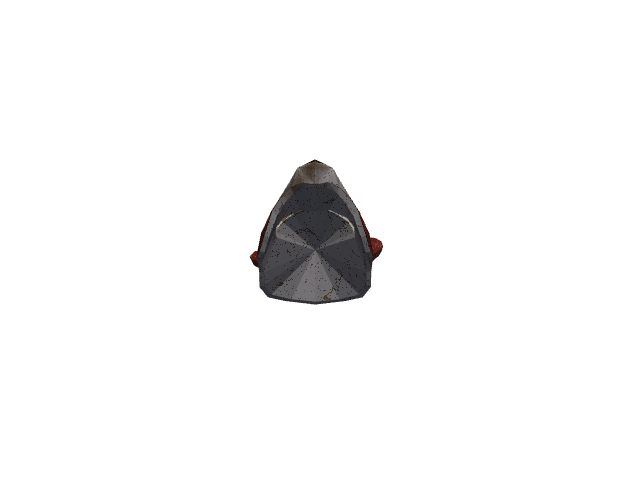

20.4985167265352


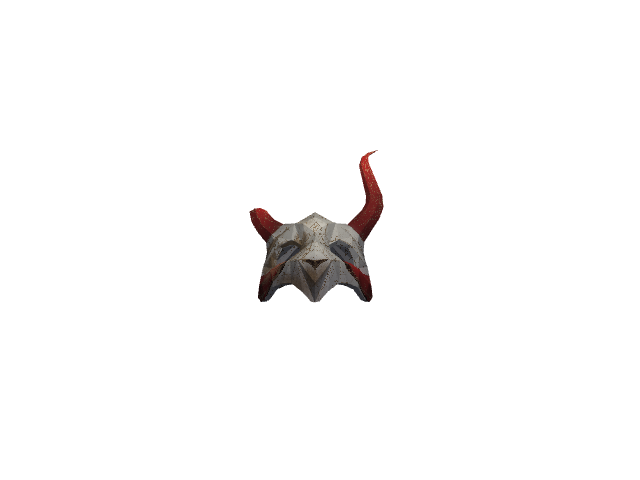

19.886323335577533


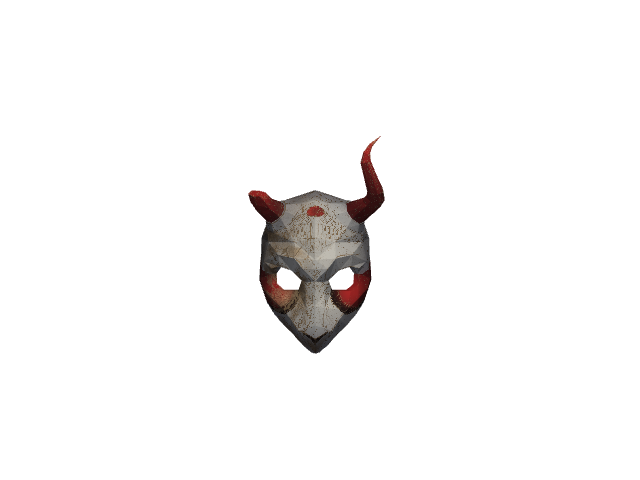

20.169383613683795


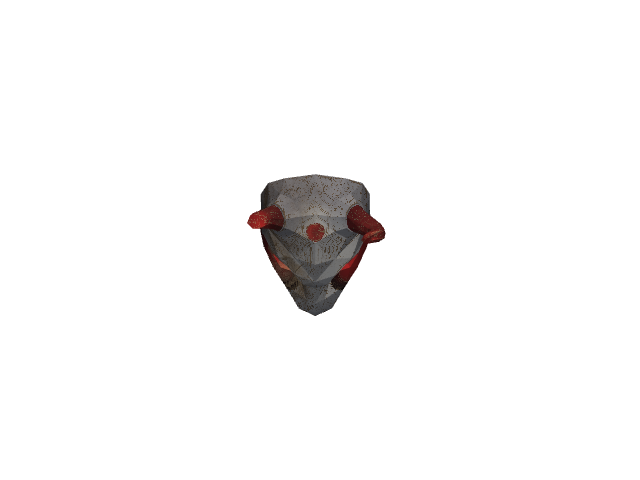

18.741639707590842


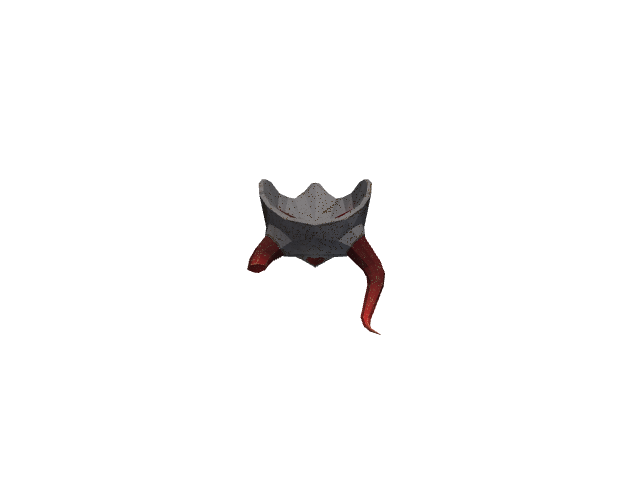

20.342726329165494


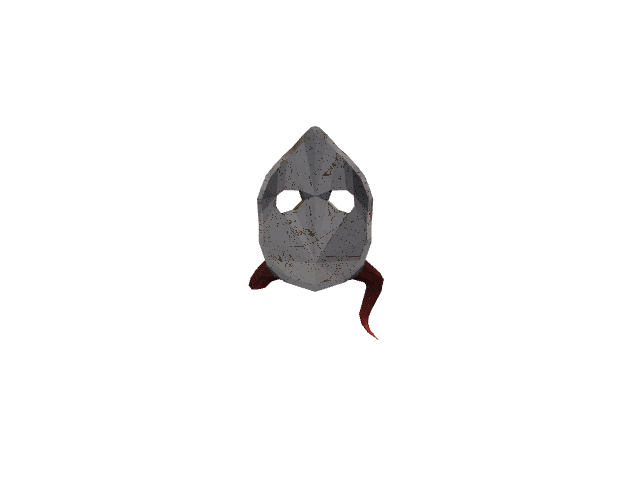

19.57521958686866


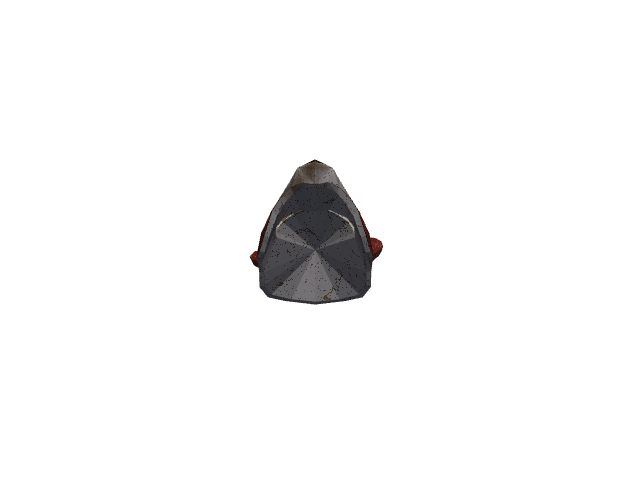

20.552556143024447


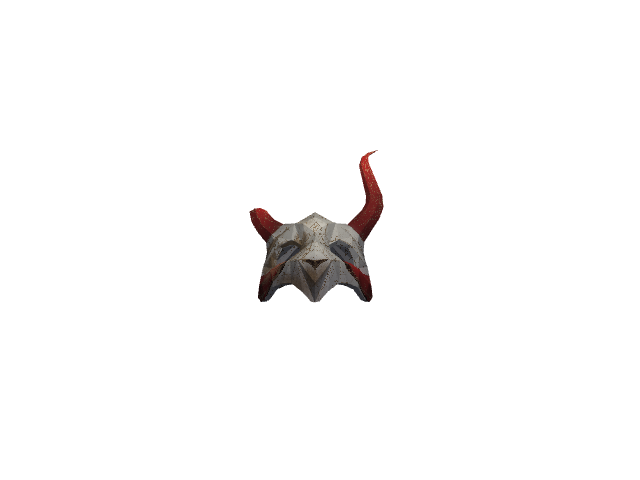

20.370884471361894


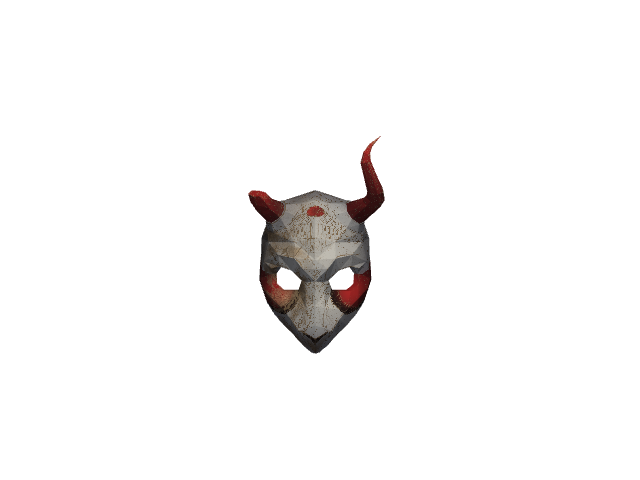

19.611556607081905


In [40]:


camera = pv.Camera()
camera.position = [0, 0, 10]

axes = pv.Axes(show_actor=True, actor_scale=2.0, line_width=5)

#camera.direction = (0, 0, 0)

near_range = 0.1
far_range = 10
camera.clipping_range = (near_range, far_range)
    
modelTransform = np.array([
 [  1.,   0.,   0.,  -0.],
   [  0.,   1.,   0.,  -0.],
   [  0.,   0.,   1., -10.],
   [  0.,   0.,   0.,   1.]
], dtype=np.float32)


projTransform = np.array([
  [ 7.11537 ,  0.     ,  0.     ,  0.     ],
   [ 0.     ,9.48716  ,  0.     ,  0.     ],
   [ 0.     ,  0.     , -1.     , -0.2    ],
   [ 0.     ,  0.     , -1.     ,  0.     ]
], dtype=np.float32)

camera.SetModelTransformMatrix(trans_to_matrix(modelTransform))
camera.SetExplicitProjectionTransformMatrix(trans_to_matrix(projTransform))
camera.SetUseExplicitProjectionTransformMatrix(1)




for i in range(20):
    start = time()
    
    pl = pv.Plotter(off_screen=True)
    pl.window_size =  640,480
    pl.background_color = (1,1,1)
    pl.camera = camera
    
    

    mesh.rotate_x(60, point=axes.origin)
    #mesh.rotate_y(60, point=axes.origin)
    #mesh.rotate_z(60, point=axes.origin)

    pl.add_mesh(mesh,texture=tex)
    
    
    
    
    
    img = pl.show(return_img=True)
    pl.render()
    img = pl.image

    print(1/(time()-start))

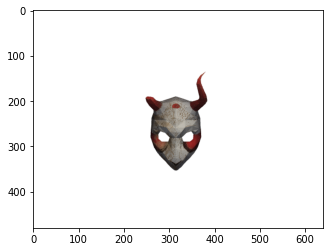

In [41]:
plt.imshow(img)

In [47]:
img.shape

In [30]:
pl.camera.Ge()

In [6]:
mtx = pl.camera.GetModelViewTransformMatrix()
mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [11]:
mtx = pl.camera.()
#mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
pl.camera.model_transform_matrix

In [ ]:
mtx = pl.camera.Ge
#mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
camera.model_transform_matrix

In [ ]:
camera.

In [ ]:
camera.model_transform_matrix

In [ ]:


points = mesh.extract_feature_edges()
points = points.points

In [48]:
import open3d as o3d
from utils.mask import Mask
import yaml

config  =yaml.load(open('./config.yml'))

mask = Mask(config=config['mesh_params'], frame_size=(640,480))

mesh = o3d.io.read_triangle_mesh("./data/3d_models/Mask.fbx")
mesh.compute_vertex_normals()

mask.render.scene.add_geometry("rotated_model", mesh, mask.mtl)

image = mask.render.render_to_image()
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGBA2RGB)

plt.imshow(image)

In [13]:
mask.render.scene.camera.get_projection_matrix()

In [14]:
mask.render.scene.camera.get_view_matrix()

In [ ]:
o3d.visualization.draw_geometries([mesh])


In [ ]:
mesh.textures = o3d.geometry.Image(img)

In [ ]:
mesh.triangle_uvs = o3d.utility.Vector2dVector(img)
o3d.visualization.draw_geometries([mesh])